# Applied Data Science Capstone 

## The Battle of the Neighborhoods-->Capstone Project ( A Peer-Graded Assginment)

*By Erick PS*

Now that we have been equipped with the skills and the tools to use location data to explore a geographical location, over the course of two weeks, we are given the opportunity to be as creative as we like and come up with an idea to leverage the Foursquare location data to explore or compare neighborhoods or cities of our choice or to come up with a problem that we can use the Foursquare location data to solve.

## Part 1).- Introduction of the Business Problem

We start by clearly defining a problem or an idea of our choice, where we need to leverage the Foursquare location data to solve or execute. We are reminded that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make we have to make sure that we explicitly describe our audience and why they would care about our problem.

**The main purpose of this small project is to help a small business owner planning to open a new restaurant in Mexico City, to help him getting an insight as to what types of restaurants are popular in different neighborhoods of Mexico City.**

As a little bit of background, in recent decades Mexico City has become a very cosmopolitan city, particularly in matters of food options. Nowadays it can be quite common for visitors to get access to tasty street-food tacos in trendy neighborhoods, while also having the opportunity to eat at a world class restaurant in the exact same neighborhood.  

## Part 2) Gathering Data and Loading Data 

For the next step we have to describe the data that we will be using to solve the problem or executing our idea. In the same way, we are reminded that we need to use the Foursquare location data to solve the problem or execute our idea. We are allowed to use different datasets in combination with the Foursquare location data. Hence, we have to make sure that provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is only Foursquare location data.

**In order to achieve the project's main goal, we will make use of a CSV file from the database provided by the official website of Mexico City's government. Such CSV contains the 
territorial delimitation of all neighborhoods within Mexico City.**

Naturally, the first step is to import all the necessary libraries for Data Analysis

In [1]:
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import requests

!pip install folium
import folium

!pip install geocoder
import geocoder

!pip install pygeocoder
from pygeocoder import Geocoder

print("Libraries done")

     |████████████████████████████████| 92kB 7.2MB/s eta 0:00:011
     |████████████████████████████████| 102kB 6.8MB/s ta 0:00:011
  Stored in directory: /home/dsxuser/.cache/pip/wheels/7c/4c/00/d05c66c4af5411c554c91b8079732c8a0359c2226fb8c01031
Successfully built pygeocoder
Libraries done


Afterwards, we proceed by downloading data about Mexico City's neighborhood from the official website of Mexico City's government.

In [2]:
link=('https://datos.cdmx.gob.mx/explore/dataset/coloniascdmx/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C')

neighborhoods=pd.read_csv(link)

neighborhoods.head()

,COLONIA,ENTIDAD,Geo Point,Geo Shape,CVE_ALC,ALCALDIA,CVE_COL,SECC_COM,SECC_PAR
0,IRRIGACION,9.0,"19.4429549298,-99.2099357048","{""type"": ""Polygon"", ""coordinates"": [[[-99.2115...",16,MIGUEL HIDALGO,16-035,"5079, 5080, 5083, 5102","5068, 5082"
1,MARINA NACIONAL (U HAB),9.0,"19.4466319056,-99.1795110575","{""type"": ""Polygon"", ""coordinates"": [[[-99.1797...",16,MIGUEL HIDALGO,16-049,"5137, 5182",NaN
2,PEDREGAL DE STO DOMINGO VI,9.0,"19.3234027183,-99.1654676133","{""type"": ""Polygon"", ""coordinates"": [[[-99.1622...",3,COYOACAN,03-144,"381, 394, 494, 416, 417, 439",NaN
3,VILLA PANAMERICANA 7MA. SECCIN (U HAB),9.0,"19.304604269,-99.1677617231","{""type"": ""Polygon"", ""coordinates"": [[[-99.1676...",3,COYOACAN,03-121,NaN,"474, 475"
4,VILLA PANAMERICANA 6TA. SECCIN (U HAB),9.0,"19.3112238873,-99.1696478642","{""type"": ""Polygon"", ""coordinates"": [[[-99.1702...",3,COYOACAN,03-120,NaN,458


NOTE: Unlike many other websites where a data scientist has to do some website scraping, for this project we are fortunate enough to have access to data that is already quite structured and detailed. Otherwise, we would have probably used BeutifulSoup to get the appropriate data from another website. 

For this project, we will only need the data related to the name of the neighborhoods, their coordinates, and name of the county that they belong to. Therefore, we get rid off of the columns that we will not use.

At this point, it is worth mentioning that `COLONIA` and `ALCALDIA` are the Spanish words equivalent to neighborhood and county, respectively. 

In [3]:
neighborhoods.drop(['CVE_ALC','CVE_COL', 'SECC_COM', 'SECC_PAR','ENTIDAD', 'Geo Shape'], axis=1, inplace=True)
neighborhoods.head()

,COLONIA,Geo Point,ALCALDIA
0,IRRIGACION,"19.4429549298,-99.2099357048",MIGUEL HIDALGO
1,MARINA NACIONAL (U HAB),"19.4466319056,-99.1795110575",MIGUEL HIDALGO
2,PEDREGAL DE STO DOMINGO VI,"19.3234027183,-99.1654676133",COYOACAN
3,VILLA PANAMERICANA 7MA. SECCIN (U HAB),"19.304604269,-99.1677617231",COYOACAN
4,VILLA PANAMERICANA 6TA. SECCIN (U HAB),"19.3112238873,-99.1696478642",COYOACAN


The coordinates of each neighborhood are overlapped in the column `Geo Point`. Considering that we will need to use the latitude and longitude separately later on in our code, we can split this column into two new columns.

In [4]:
neighborhoods[['Latitude','Longitude']]=neighborhoods['Geo Point'].str.split(",",expand=True)
neighborhoods.head()

,COLONIA,Geo Point,ALCALDIA,Latitude,Longitude
0,IRRIGACION,"19.4429549298,-99.2099357048",MIGUEL HIDALGO,19.4429549298,-99.2099357048
1,MARINA NACIONAL (U HAB),"19.4466319056,-99.1795110575",MIGUEL HIDALGO,19.4466319056,-99.1795110575
2,PEDREGAL DE STO DOMINGO VI,"19.3234027183,-99.1654676133",COYOACAN,19.3234027183,-99.1654676133
3,VILLA PANAMERICANA 7MA. SECCIN (U HAB),"19.304604269,-99.1677617231",COYOACAN,19.304604269,-99.1677617231
4,VILLA PANAMERICANA 6TA. SECCIN (U HAB),"19.3112238873,-99.1696478642",COYOACAN,19.3112238873,-99.1696478642


Finally, we can get remove the `Geo Point` column altogether.

In [5]:
neighborhoods.drop(['Geo Point'], axis=1, inplace=True)
neighborhoods.head()

,COLONIA,ALCALDIA,Latitude,Longitude
0,IRRIGACION,MIGUEL HIDALGO,19.4429549298,-99.2099357048
1,MARINA NACIONAL (U HAB),MIGUEL HIDALGO,19.4466319056,-99.1795110575
2,PEDREGAL DE STO DOMINGO VI,COYOACAN,19.3234027183,-99.1654676133
3,VILLA PANAMERICANA 7MA. SECCIN (U HAB),COYOACAN,19.304604269,-99.1677617231
4,VILLA PANAMERICANA 6TA. SECCIN (U HAB),COYOACAN,19.3112238873,-99.1696478642


In the process of cleaning up our data, we should consider removing also data that might be duplicated in our data frame.

In [6]:
neighborhoods = neighborhoods.drop_duplicates(subset=['Latitude', 'Longitude'], keep='first')
neighborhoods.shape

(1809, 4)

We are almost done preparing our data, but we are still missing checking out if our data has the appropriate data type.

In [7]:
neighborhoods.dtypes

COLONIA      object
ALCALDIA     object
Latitude     object
Longitude    object
dtype: object

Here we can see that the data regarding latitude and longitude are considered an object type instead of a numeric (`float` to be more specific) type. So we have to make a simple adjustment.

In [8]:
neighborhoods[['Latitude','Longitude']] = neighborhoods[['Latitude','Longitude']].astype(float)
neighborhoods.dtypes

COLONIA       object
ALCALDIA      object
Latitude     float64
Longitude    float64
dtype: object

And just to make sure, we get rid-off rows that might be missing data.

In [9]:
neighborhoods=neighborhoods.dropna()

We create a folium map that's centered at the latitude and longitude to of Roma, a location within Mexico City known for his art deco building and culinary offers. We then loop through each location in the data frame and plot out a blue circle of radius 500 in each location's latitude and longitude.

In [10]:
g = geocoder.arcgis('06760 , Mexico')
lat_lng_coords = g.latlng
latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

MexicoCity_map = folium.Map(location=[latitude, longitude], zoom_start=12)
for lat, lng, colonia in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['COLONIA']):
    label = '{}'.format(colonia)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=500,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(MexicoCity_map)  
    
MexicoCity_map

We can then proceed to create the variables that will be used as parameters to Foursquare's API  later.

In [11]:
CLIENT_ID = 'VB2BBB1XXUATNZXP5N440IM3J5UVG2NXZC5B04Q05AN3GBS4' # your Foursquare ID
CLIENT_SECRET = '2UD2D1BRGCMQBHYOSM3T42IWKWJ2UKY0ICZZ3TVCKXFDEYSF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
LIMIT = 500
radius = 500

Your credentails:
CLIENT_ID: VB2BBB1XXUATNZXP5N440IM3J5UVG2NXZC5B04Q05AN3GBS4
CLIENT_SECRET:2UD2D1BRGCMQBHYOSM3T42IWKWJ2UKY0ICZZ3TVCKXFDEYSF


For this step, we create a function that will call Foursquare's API with the variables created earlier as additional parameters. Such a call will retrieve the venues of the "Food" category, as well as it will print the locations wherein there are no venues nearby. Finally, the function will return a data frame containing each restaurant found along with their category, location, latitude, and longitude.

In [12]:
def get_restaurants(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL filtering by Food Category
        url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['venues']
        except KeyError:
            print("no restaurants: {} ".format(name))
            continue;
            
        if len(results) == 0:
            print("no restaurants: {} ".format(name))
        
        # return only relevant information for each nearby venue
        for v in results:
            try:
                venues_list.append([(
                    name, 
                    lat, 
                    lng, 
                    v['name'], 
                    v['location']['lat'], 
                    v['location']['lng'],  
                    v['categories'][0]['name'])])
            except IndexError:
                print("Index Error: {}".format(v['name']))

    nearby_restaurants = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_restaurants.columns = ['Location', 
                  'Location Latitude', 
                  'Location Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_restaurants)

Afterwards, we call the function created and pass the data frame containing Mexico City's coordinates and neighborhoods along with the radius while saving the returned data frame to the variable MexicoCity_restaurants.

In [13]:
MexicoCity_restaurants = get_restaurants(names=neighborhoods['COLONIA'],
                                latitudes=neighborhoods['Latitude'],
                                longitudes=neighborhoods['Longitude'],
                                radius=radius
                                )

no restaurants: TEZONTITLA-ZOMPANTITLA 
no restaurants: CAZULCO (BARR) 
no restaurants: ALTOS TEPETLICA 
no restaurants: LA PILA 
no restaurants: EL GAVILLERO 
no restaurants: SAN FRANCISCO TLALNEPANTLA (PBLO) 
no restaurants: SAN FRANCISCO CHIQUIMOLA 
no restaurants: AHUACATITLA 
no restaurants: PARAISO SANTA CATARINA 
no restaurants: MALACATES (AMPL) 
no restaurants: SAN JOSE OBRERO 
no restaurants: SAN LORENZO (BARR) 
no restaurants: MIRAVALLE 
no restaurants: SAN JUAN TEPENAHUAC (PBLO) 
no restaurants: XAXALCO 
no restaurants: TEMPILULI 
no restaurants: SAN MIGUEL (AMPL) 
no restaurants: SAN MIGUEL TOPILEJO (PBLO) 
no restaurants: CUITLAHUAC 
no restaurants: EMILIANO ZAPATA 2A 
no restaurants: PRADO CHURUBUSCO 
no restaurants: ALIANZA POPULAR REVOLUCIONARIA NORTE (U HAB) 
no restaurants: PEDREGAL DE SANTA URSULA IV 
no restaurants: EL ROSEDAL II 
no restaurants: PRESIDENTES EJIDALES SEGUNDA SECCION 
no restaurants: CANDELARIA DELOS PATOS (U HAB) 
no restaurants: LORENZO BOTURINI 
n

We display the first and last five rows of the MexicoCity_restaurants data frame to check that everything is in order.

In [14]:
MexicoCity_restaurants.head()

,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,IRRIGACION,19.442955,-99.209936,La Pantera Fresca,19.442104,-99.209314,Ice Cream Shop
1,IRRIGACION,19.442955,-99.209936,Sushi Roll,19.441363,-99.207435,Sushi Restaurant
2,IRRIGACION,19.442955,-99.209936,City Café,19.441001,-99.206241,Diner
3,IRRIGACION,19.442955,-99.209936,Tacos Gus,19.444470,-99.211959,Taco Place
4,IRRIGACION,19.442955,-99.209936,Panmex,19.440615,-99.208584,Bakery


In [15]:
MexicoCity_restaurants.tail()

,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
38787,PILOTO CULHUACAN (U HAB),19.322291,-99.111797,Caldos de gallina la virgen,19.321257,-99.108977,Mexican Restaurant
38788,PILOTO CULHUACAN (U HAB),19.322291,-99.111797,El Pibilcito,19.323274,-99.111174,Taco Place
38789,PILOTO CULHUACAN (U HAB),19.322291,-99.111797,Café Huitzil,19.324671,-99.113289,Breakfast Spot
38790,PILOTO CULHUACAN (U HAB),19.322291,-99.111797,Taqueria La Morena de los Mixes,19.326552,-99.114744,Taco Place
38791,PILOTO CULHUACAN (U HAB),19.322291,-99.111797,Restaurante Hotel Residencial Naval,19.318274,-99.112960,Breakfast Spot


Using matplotlib, we can create a horizontal bar plot that plots the number of restaurants for each restaurant category in the MexicoCity_restaurants data frame.

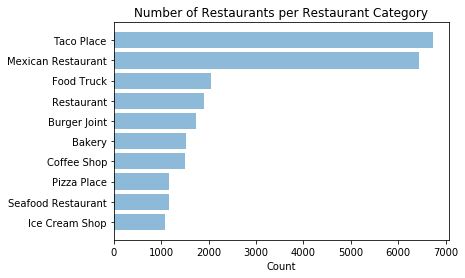

In [16]:
restaurant_cat = MexicoCity_restaurants['Venue Category'].value_counts()
restaurants = list(restaurant_cat.index[0:10])
y_pos = np.arange(len(restaurants))
number = restaurant_cat[0:10]

plt.barh(y_pos, number, align='center', alpha=0.5)
plt.yticks(y_pos, restaurants)
plt.xlabel('Count')
plt.title('Number of Restaurants per Restaurant Category')
plt.gca().invert_yaxis()

plt.rcParams['figure.figsize'] = (10, 6)
plt.show()

Taco Places are shown to be the most common restaurant category with thousands of instances, followed by **actual** Mexican cuisine restaurants, then by general Food Trucks.

Hence, we will then perform a one-hot encoding on the Venue Category column, which implies the category of the restaurant for later use in clustering.

In [17]:
# one hot encoding
MexicoCity_onehot = pd.get_dummies(MexicoCity_restaurants[['Venue Category']], prefix="", prefix_sep="")

# add location column back to dataframe
MexicoCity_onehot['Location'] = MexicoCity_restaurants['Location'] 

# move location column to the first column
fixed_columns = [MexicoCity_onehot.columns[-1]] + list(MexicoCity_onehot.columns[:-1])
MexicoCity_onehot = MexicoCity_onehot[fixed_columns]

MexicoCity_onehot.head()

,Location,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Asian Restaurant,...,Trade School,Turkish Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Well,Winery,Wings Joint,Yucatecan Restaurant
0,IRRIGACION,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,IRRIGACION,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,IRRIGACION,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,IRRIGACION,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,IRRIGACION,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Our next step consists of grouping rows together by location and getting the mean of each category for each location, which would then imply the weight of the category's rarity for that said location.

In [18]:
MexicoCity_grouped = MexicoCity_onehot.groupby('Location').mean().reset_index()
MexicoCity_grouped.head()

,Location,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Asian Restaurant,...,Trade School,Turkish Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Well,Winery,Wings Joint,Yucatecan Restaurant
0,12 DE DICIEMBRE,0.0,0.0,0.021739,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.021739,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.0
1,15 DE AGOSTO,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,1A AMPLIACION SANTIAGO ACAHUALTEPEC,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0
3,1RA VICTORIA,0.0,0.0,0.020408,0.0,0.0,0.0,0.020408,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.020408,0.0
4,1o DE MAYO,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


As a way to visualize each location's most common restaurant category near it, we can create a function that returns the "nth"  most common restaurant categories near it. Therefore we will create a data frame with the column 'Location' along with the top 5 most common restaurant categories near the location, and call this new data frame: MexicoCity_sorted.

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
MexicoCity_sorted = pd.DataFrame(columns=columns)
MexicoCity_sorted['Location'] = MexicoCity_grouped['Location']

for ind in np.arange(MexicoCity_grouped.shape[0]):
    MexicoCity_sorted.iloc[ind, 1:] = return_most_common_venues(MexicoCity_grouped.iloc[ind, :], num_top_venues)

print(MexicoCity_sorted.shape)
MexicoCity_sorted.head()

(907, 6)


,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,12 DE DICIEMBRE,Burger Joint,Taco Place,Snack Place,Fried Chicken Joint,Seafood Restaurant
1,15 DE AGOSTO,Taco Place,Mexican Restaurant,Food Truck,BBQ Joint,Restaurant
2,1A AMPLIACION SANTIAGO ACAHUALTEPEC,Mexican Restaurant,Taco Place,BBQ Joint,Restaurant,Wings Joint
3,1RA VICTORIA,Taco Place,Mexican Restaurant,Burger Joint,Food Truck,Food Stand
4,1o DE MAYO,Mexican Restaurant,Yucatecan Restaurant,Gluten-free Restaurant,Fair,Factory


## Part 3 ).- Data Modeling and Model's Assesment

Now that we have all of our data prepared, it is time to implement a model that will help our small business owner to take a more educated decision in relationship with his future restaurant. 
For this project, we will use a machine learning tool called K-Means Clustering, and that will be implemented on our data frame.

Another aspect that needs to be pointed out, is that one of the problems in K-means Clustering is finding the proper K as a parameter. To find the proper K, we can use the average silhouette method to find the number of clusters to use for our clustering.


We will begin by removing Location from the data frame so that the data will solely be the weights of the categories.

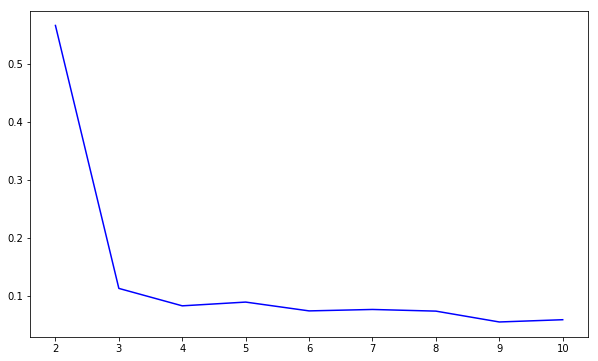

In [20]:
num_of_cluster = range(2,11)
x = range(2, 11)
y = []
y_silhouette = []
MexicoCity_grouped_clustering = MexicoCity_grouped.drop('Location', 1)
for kclusters in num_of_cluster:
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(MexicoCity_grouped_clustering)
    label = kmeans.labels_
    y_silhouette.append(silhouette_score(MexicoCity_grouped_clustering, label, metric='euclidean'))
plt.plot(x, y_silhouette, 'b-')
plt.show()

With the average silhouette score as the scoring basis, our highest point is achieved when k is 2. Hence we will choose such a number as the optimum number of clusters to use.

In the same way, we will also perform K-means clustering again with 5 as the cluster parameter.

In [21]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(MexicoCity_grouped_clustering)
kmeans.labels_[0:10]

array([1, 1, 1, 2, 0, 2, 2, 2, 1, 2], dtype=int32)

For our next step, we will now add the cluster labels to the `MexicoCity_sorted` data frame(the data frame which contains the location and the top 5 most common restaurant venues near it).

Moreover, we will also add 1 to our cluster label so that the first cluster starts at cluster 1 instead of 0, in order to improve readability.

In [22]:
MexicoCity_sorted['Cluster Labels'] = kmeans.labels_
MexicoCity_merged = neighborhoods.copy()

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
MexicoCity_merged = MexicoCity_merged.join(MexicoCity_sorted.set_index('Location'), on='COLONIA').reset_index()

MexicoCity_merged['Cluster Labels'] += 1
MexicoCity_merged.head() # check the last columns!

,index,COLONIA,ALCALDIA,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster Labels
0,0,IRRIGACION,MIGUEL HIDALGO,19.442955,-99.209936,Taco Place,Mexican Restaurant,Fast Food Restaurant,Coffee Shop,Café,2.0
1,1,MARINA NACIONAL (U HAB),MIGUEL HIDALGO,19.446632,-99.179511,Mexican Restaurant,Taco Place,Food Truck,Pizza Place,Coffee Shop,2.0
2,2,PEDREGAL DE STO DOMINGO VI,COYOACAN,19.323403,-99.165468,Mexican Restaurant,Taco Place,Bakery,Burger Joint,Fast Food Restaurant,3.0
3,3,VILLA PANAMERICANA 7MA. SECCIN (U HAB),COYOACAN,19.304604,-99.167762,Mexican Restaurant,Taco Place,Ice Cream Shop,Burger Joint,Café,2.0
4,4,VILLA PANAMERICANA 6TA. SECCIN (U HAB),COYOACAN,19.311224,-99.169648,Mexican Restaurant,Taco Place,Food Truck,Food Stand,Fast Food Restaurant,2.0


After some failed attempts with the next map, we first need to make another adjustment in our data frame to remove empty value in our rows.

In [23]:
MexicoCity_merged=MexicoCity_merged.dropna()

We will proceed with our model by creating and showing the folium map which shows the same map as before but now showing different colors for each circle according to their cluster membership.

In [24]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 2, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(MexicoCity_merged['Latitude'], MexicoCity_merged['Longitude'], MexicoCity_merged['COLONIA'], MexicoCity_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

## Part 4).- Results and Discussion

We can continue our analysis by looking at what locations belong to each cluster and show a vertical bar graph that depicts the top 5 most common restaurant categories within the cluster.

The cluster names are based on their topmost common restaurant category.

We can start by first checking out Cluster # 1 - Taco Place.

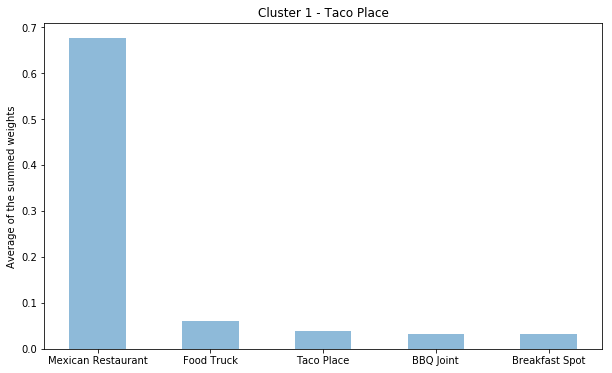

,index,COLONIA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster Labels
0,34,LA MAGDALENA PETLACALCO (PBLO),Mexican Restaurant,Creperie,Coffee Shop,Molecular Gastronomy Restaurant,Food Stand,1.0
1,98,1o DE MAYO,Mexican Restaurant,Yucatecan Restaurant,Gluten-free Restaurant,Fair,Factory,1.0
2,104,CAMPESTRE POTRERO,Breakfast Spot,Mexican Restaurant,Farm,Falafel Restaurant,Fair,1.0
3,212,CRUZ BLANCA,Mexican Restaurant,Yucatecan Restaurant,Gluten-free Restaurant,Fair,Factory,1.0
4,270,SAN MIGUEL TEHUISCO-LOS ANGELES-AYOMETITLA,Mexican Restaurant,Yucatecan Restaurant,Gluten-free Restaurant,Fair,Factory,1.0
5,320,PORTAL DEL SOL,Mexican Restaurant,Burger Joint,Yucatecan Restaurant,Convenience Store,Fair,1.0
6,321,EL OCOTAL,Mexican Restaurant,Food Truck,Yucatecan Restaurant,Diner,Factory,1.0
7,481,SAN SALVADOR CUAUHTENCO (PBLO),Mexican Restaurant,Restaurant,Taco Place,Diner,Factory,1.0
8,702,SAN PABLO CHIMALPA (PBLO),Mexican Restaurant,Taco Place,Yucatecan Restaurant,Donut Shop,Fair,1.0
9,723,SAN PEDRO ATOCPAN (PBLO),Mexican Restaurant,Coffee Shop,Restaurant,Pizza Place,Burger Joint,1.0


In [25]:
cluster_zero_members = MexicoCity_merged.loc[MexicoCity_merged['Cluster Labels'] == 1]
summed_means = MexicoCity_grouped[MexicoCity_grouped['Location'].isin(cluster_zero_members['COLONIA'])].sum()[1:]
mean_categories = (summed_means/len(cluster_zero_members)).sort_values(ascending=False)

restaurants = list(mean_categories.index[0:5])
y_pos = np.arange(len(restaurants))
number = mean_categories[0:5]

plt.bar(y_pos, number, align='center', alpha=0.5, width=0.5)
plt.xticks(y_pos, restaurants)
plt.ylabel('Average of the summed weights')
plt.title('Cluster 1 - Taco Place')

plt.rcParams['figure.figsize'] = (10, 6)
plt.show()


MexicoCity_merged.loc[MexicoCity_merged['Cluster Labels'] == 1, MexicoCity_merged.columns[[1] + list(range(5, MexicoCity_merged.shape[1]))]].reset_index()

In the first cluster, which only has 5 locations, we can notice that Mexican Cuisine joints are very common in those locations, those locations may prefer more traditional meals as opposed to the regular restaurants that offer more variety in their type of dishes. A contributing factor to that insight is that Taco Place is the third most common category within that cluster, followed by a draw between BBQ joint and Breakfast which both can have several elements in common to the Mexican Cuisine.

We can proceed by looking at Cluster # 2 - Mexican Cuisine Restaurant.

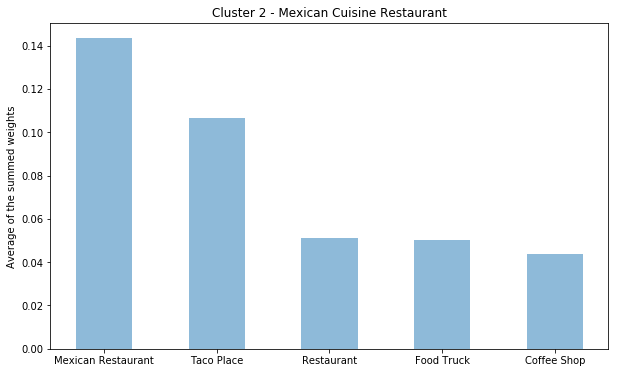

,index,COLONIA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster Labels
0,0,IRRIGACION,Taco Place,Mexican Restaurant,Fast Food Restaurant,Coffee Shop,Café,2.0
1,1,MARINA NACIONAL (U HAB),Mexican Restaurant,Taco Place,Food Truck,Pizza Place,Coffee Shop,2.0
2,3,VILLA PANAMERICANA 7MA. SECCIN (U HAB),Mexican Restaurant,Taco Place,Ice Cream Shop,Burger Joint,Café,2.0
3,4,VILLA PANAMERICANA 6TA. SECCIN (U HAB),Mexican Restaurant,Taco Place,Food Truck,Food Stand,Fast Food Restaurant,2.0
4,5,SANTA CRUZ AVIACION,Taco Place,Mexican Restaurant,Food Truck,Bakery,Diner,2.0


In [26]:
cluster_two_members = MexicoCity_merged.loc[MexicoCity_merged['Cluster Labels'] == 2]
summed_means = MexicoCity_grouped[MexicoCity_grouped['Location'].isin(cluster_two_members['COLONIA'])].sum()[1:]
mean_categories = (summed_means/len(cluster_two_members)).sort_values(ascending=False)

restaurants = list(mean_categories.index[0:5])
y_pos = np.arange(len(restaurants))
number = mean_categories[0:5]

plt.bar(y_pos, number, align='center', alpha=0.5, width=0.5)
plt.xticks(y_pos, restaurants)
plt.ylabel('Average of the summed weights')
plt.title('Cluster 2 - Mexican Cuisine Restaurant')

plt.show()



MexicoCity_merged.loc[MexicoCity_merged['Cluster Labels'] == 2, MexicoCity_merged.columns[[1] + list(range(5, MexicoCity_merged.shape[1]))]].reset_index().head()

In [27]:
MexicoCity_merged.loc[MexicoCity_merged['Cluster Labels'] == 2, MexicoCity_merged.columns[[1] + list(range(5, MexicoCity_merged.shape[1]))]].reset_index().tail()

,index,COLONIA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster Labels
438,1642,BOSQUES DE LAS LOMAS,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Burger Joint,2.0
439,1668,BELISARIO DOMINGUEZ,Taco Place,Coffee Shop,Mexican Restaurant,Comfort Food Restaurant,Café,2.0
440,1721,CHIMALISTAC,Mexican Restaurant,Japanese Restaurant,Café,Coffee Shop,Wings Joint,2.0
441,1760,LOS CIPRESES,Taco Place,Pizza Place,Breakfast Spot,Ice Cream Shop,Mexican Restaurant,2.0
442,1761,EL TRIANGULO,Burger Joint,Yucatecan Restaurant,Convenience Store,Falafel Restaurant,Fair,2.0


For this cluster, we can notice that locations usually have Mexican Cuisine Restaurants being the top most common restaurants. So far it seems that people living in those locations also may prefer more traditional types of cuisines. This can be an interesting insight, considering that for this cluster there are several high-end neighborhoods also known for holding several famous restaurants with different types of cuisines.

Now it time to check out Cluster # 3 - Food Truck Cluster.

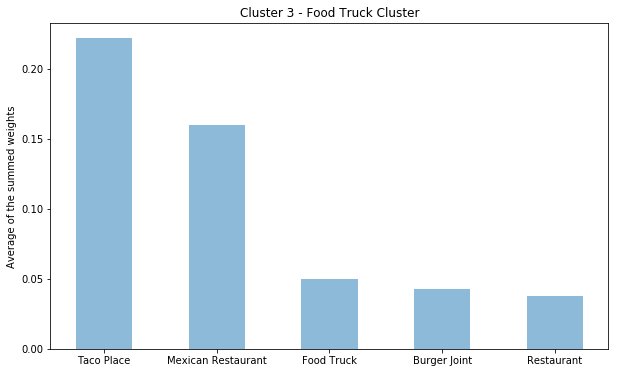

,index,COLONIA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster Labels
0,2,PEDREGAL DE STO DOMINGO VI,Mexican Restaurant,Taco Place,Bakery,Burger Joint,Fast Food Restaurant,3.0
1,6,MAGDALENA MIXHUCA,Mexican Restaurant,Taco Place,Restaurant,Breakfast Spot,Bakery,3.0
2,9,AJUSCO HUAYAMILPAS,Taco Place,Food Truck,Mexican Restaurant,Coffee Shop,Diner,3.0
3,11,EL ARENAL PTO AEREO (FRACC),Taco Place,Mexican Restaurant,Seafood Restaurant,Burger Joint,Food Truck,3.0
4,18,CONSTITUCION DE LA REPUBLICA,Mexican Restaurant,Taco Place,Food Truck,Seafood Restaurant,Wings Joint,3.0


In [28]:
cluster_three_members = MexicoCity_merged.loc[MexicoCity_merged['Cluster Labels'] == 3]
summed_means = MexicoCity_grouped[MexicoCity_grouped['Location'].isin(cluster_three_members['COLONIA'])].sum()[1:]
mean_categories = (summed_means/len(cluster_three_members)).sort_values(ascending=False)

restaurants = list(mean_categories.index[0:5])
y_pos = np.arange(len(restaurants))
number = mean_categories[0:5]

plt.bar(y_pos, number, align='center', alpha=0.5, width=0.5)
plt.xticks(y_pos, restaurants)
plt.ylabel('Average of the summed weights')
plt.title('Cluster 3 - Food Truck Cluster')

plt.show()

MexicoCity_merged.loc[MexicoCity_merged['Cluster Labels'] == 3, MexicoCity_merged.columns[[1] + list(range(5, MexicoCity_merged.shape[1]))]].reset_index().head()

In [29]:
MexicoCity_merged.loc[MexicoCity_merged['Cluster Labels'] == 3, MexicoCity_merged.columns[[1] + list(range(5, MexicoCity_merged.shape[1]))]].reset_index().tail()

,index,COLONIA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster Labels
499,1587,MORELOS II,Taco Place,Mexican Restaurant,Burger Joint,Restaurant,Bakery,3.0
500,1618,LA CRUZ,Taco Place,Mexican Restaurant,Fast Food Restaurant,Cafeteria,Restaurant,3.0
501,1622,LA MALINCHE,Taco Place,Mexican Restaurant,Bakery,Food,Pizza Place,3.0
502,1782,BENITO JUAREZ,Taco Place,Coffee Shop,Burrito Place,Burger Joint,Breakfast Spot,3.0
503,1802,LOS OLIVOS (U HAB),Taco Place,Mexican Restaurant,Food Truck,Fried Chicken Joint,Seafood Restaurant,3.0


In this last cluster, we can notice that the scores of the top 5 categories now it favors in greater measure  Taco Places. Locations in Cluster 3 may be busy locations where there are lots of spots serving different kinds of tacos food for most customers based on their price and convenience. People in this cluster may also have a wide array of preferences for restaurants, yet their daily schedule might incentivize them to consider the relatively cheap and fast delivery options as we can see based on the popularity of Food Trucks and Burger Joints. 

Finally, we can look at a chart containing the amount of location for each cluster within Mexico City.

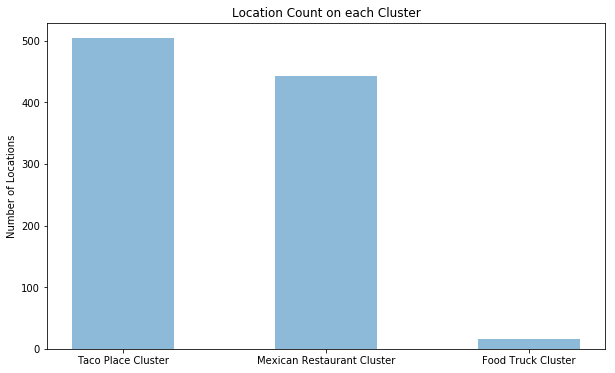

In [30]:
values = MexicoCity_merged['Cluster Labels'].value_counts()
restaurants = ['Taco Place Cluster',
               'Mexican Restaurant Cluster',
              'Food Truck Cluster',]
               
y_pos = np.arange(len(restaurants))
number = values[:]

plt.bar(y_pos, number, align='center', alpha=0.5, width=0.5)
plt.xticks(y_pos, restaurants)
plt.ylabel('Number of Locations')
plt.title('Location Count on each Cluster')

plt.show()

## Part 5 ).-Conclusion

To conclude this project, we can confidently notice that the first cluster, the `Taco Place Cluster` has the most locations belonging to that cluster followed by `Mexican Cuisine Restaurant Cluster`. These two clusters have a small difference in the number of locations between each other as compared to the `Food Truck Cluster` which makes up the least amount of locations falling inside the cluster

Needless to say, it is quite evident that `Mexican Cuisine Restaurants` are frequently present inside Mexico City location. However, considering the fact that Mexico City is nowadays a very cosmopolitan city in matters of culinary offers, seems to be significantly underestimated by **Foursquare's API**.